In [1]:
import numpy as np 

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt 

In [5]:
from sklearn.preprocessing import StandardScaler 

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [8]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [9]:
data = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')

In [10]:
print(data.describe())

           Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000


In [11]:
def give_names_to_indices(ind):
    if ind==0:
        return 'Extremely Weak'
    elif ind==1:
        return 'Weak'
    elif ind==2:
        return 'Normal'
    elif ind==3:
        return 'OverWeight'
    elif ind==4:
        return 'Obesity'
    elif ind==5:
        return 'Extremely Obese'


In [12]:
data['Index'] = data['Index'].apply(give_names_to_indices)

In [15]:
fit_reg=False

In [16]:
aspect=1,

In [18]:
height=7

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


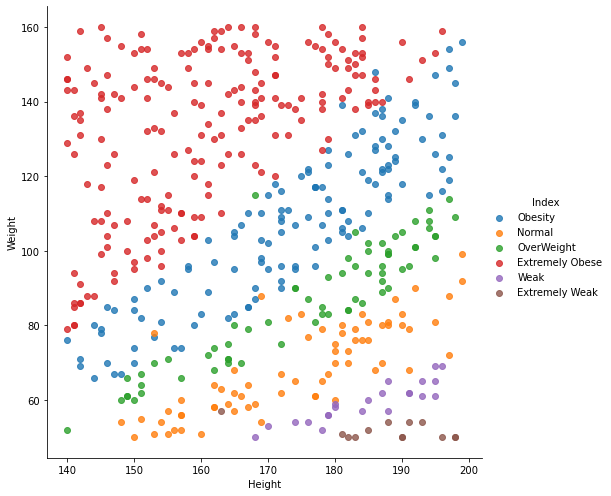

In [22]:

sns.lmplot('Height','Weight',data,hue='Index',height=7,aspect=1,fit_reg=False)

In [25]:
people = data['Gender'].value_counts()

In [26]:
categories = data['Index'].value_counts()

In [27]:
data[data['Gender']=='Male']['Index'].value_counts()

Extremely Obese    105
Obesity             59
OverWeight          32
Normal              28
Weak                15
Extremely Weak       6
Name: Index, dtype: int64

In [28]:
data[data['Gender']=='Female']['Index'].value_counts()

Extremely Obese    93
Obesity            71
Normal             41
OverWeight         36
Weak                7
Extremely Weak      7
Name: Index, dtype: int64

In [29]:
data2 = pd.get_dummies(data['Gender'])

In [30]:
data.drop('Gender',axis=1,inplace=True)

In [31]:
data = pd.concat([data,data2],axis=1)

In [32]:
y=data['Index']

In [33]:
data =data.drop(['Index'],axis=1)

In [34]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
data=pd.DataFrame(data)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=101)

In [36]:
param_grid = {'n_estimators':[100,200,300,400,500,600,700,800,1000]}
grid_cv = GridSearchCV(RandomForestClassifier(random_state=101),param_grid,verbose=3)


In [37]:
grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..................n_estimators=100;, score=0.857 total time=   0.2s
[CV 2/5] END ..................n_estimators=100;, score=0.886 total time=   0.1s
[CV 3/5] END ..................n_estimators=100;, score=0.829 total time=   0.1s
[CV 4/5] END ..................n_estimators=100;, score=0.786 total time=   0.2s
[CV 5/5] END ..................n_estimators=100;, score=0.900 total time=   0.2s
[CV 1/5] END ..................n_estimators=200;, score=0.843 total time=   0.4s
[CV 2/5] END ..................n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5] END ..................n_estimators=200;, score=0.843 total time=   0.5s
[CV 4/5] END ..................n_estimators=200;, score=0.829 total time=   0.3s
[CV 5/5] END ..................n_estimators=200;, score=0.886 total time=   0.4s
[CV 1/5] END ..................n_estimators=300;, score=0.843 total time=   0.5s
[CV 2/5] END ..................n_estimators=300;,

GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 1000]},
             verbose=3)

In [38]:
print(grid_cv.best_params_)

{'n_estimators': 200}


In [39]:
pred = grid_cv.predict(X_test)

In [41]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('Acuuracy is --> ',accuracy_score(y_test,pred)*100)
print('\n')

                 precision    recall  f1-score   support

Extremely Obese       0.91      0.97      0.94        63
 Extremely Weak       1.00      1.00      1.00         1
         Normal       0.92      0.96      0.94        23
        Obesity       0.78      0.82      0.79        38
     OverWeight       0.92      0.58      0.71        19
           Weak       0.83      0.83      0.83         6

       accuracy                           0.87       150
      macro avg       0.89      0.86      0.87       150
   weighted avg       0.88      0.87      0.87       150



[[61  0  0  2  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0 22  0  0  1]
 [ 6  0  0 31  1  0]
 [ 0  0  1  7 11  0]
 [ 0  0  1  0  0  5]]


Acuuracy is -->  87.33333333333333




In [49]:
def lp(details):
    gender = details[0]
    height = details[1]
    weight = details[2]
    
    if gender=='Male':
        details=np.array([[np.float64(height),np.float64(weight),0.0,1.0]])
    elif gender=='Female':
        details=np.array([[np.float64(height),np.float64(weight),1.0,0.0]])
    
    y_pred = grid_cv.predict(scaler.transform(details))
    return (y_pred[0]) 
    

In [50]:
your_details = ['Male',175,80]
print(lp(your_details))   

OverWeight


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
